# U.S. Medical Insurance Costs

In this project, a CSV file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within insurance.csv to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# To-Dos
* Diagrams
* Unique values for categorical data columns
* Analysis of influence of factors
* Do smokers have to pay 10x the amount of non-smokers?

# Hints
* Find out the average age of the patients in the dataset.
* Analyze where a majority of the individuals are from.
* Look at the different costs between smokers vs. non-smokers.
* Figure out what the average age is for someone who has at least one child in this dataset.

# Optional
* Organize your findings into dictionaries, lists, or another convenient datatype.
* Make predictions about what features are the most influential for an individual’s medical insurance charges based on your analysis.
* Explore areas where the data may include bias and how that would impact potential use cases.
* Is there measurable correlation between overweight and smokers?

## Average age of the patients in the dataset

In [4]:
print(df['age'].mean())

39.20702541106129


## Region Distribution

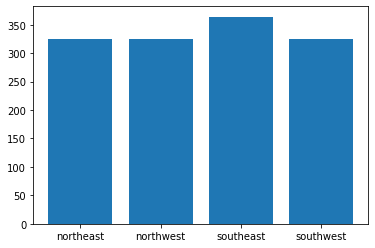

In [5]:
region_distribution = df.groupby('region').age.count().reset_index()
region_distribution = region_distribution.rename(columns={'region': 'region', 'age': 'count'})
region_distribution

plt.bar(x=region_distribution['region'], height=region_distribution['count'])
plt.show()

## Smoker vs. non-smoker

In [6]:
smoker_vs_non_smoker = df.groupby(['smoker']).charges.mean()
smoker_vs_non_smoker

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

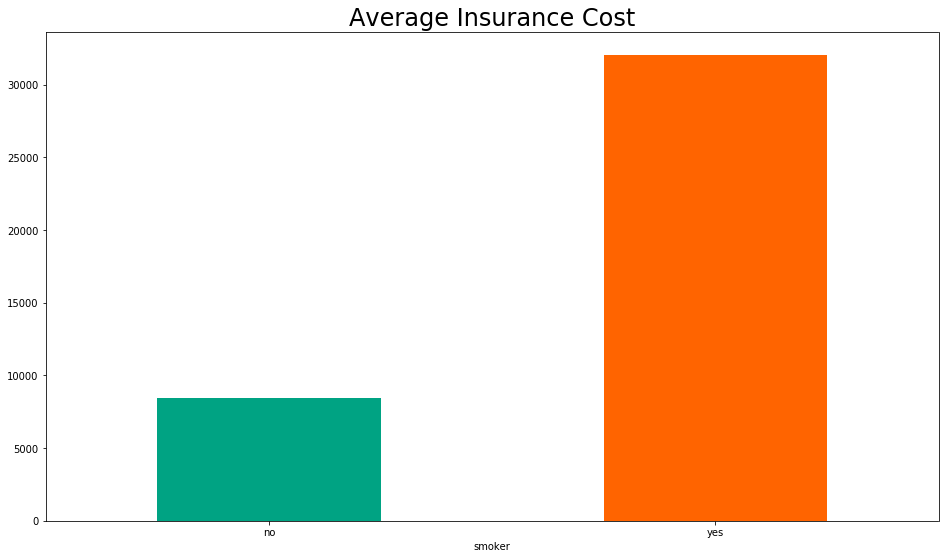

In [7]:
fig = smoker_vs_non_smoker.plot(kind='bar', figsize=(16, 9), color=['#00A383', '#FF6400'])
plt.title('Average Insurance Cost', size=24)
plt.xticks(rotation=0)
plt.show()

## Average age is for someone who has at least one child

In [8]:
df['has_children'] = df.apply(lambda row: row['children'] != 0, axis=1)

average_age_for_parents = df.groupby(['has_children']).age.mean()
average_age_for_parents

has_children
False    38.444251
True     39.780105
Name: age, dtype: float64

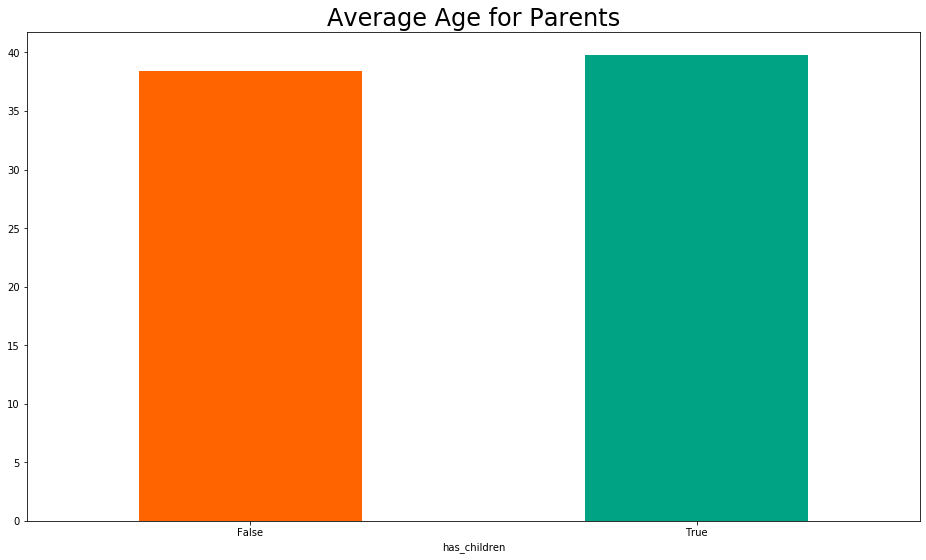

In [9]:
fig = average_age_for_parents.plot(kind='bar', figsize=(16, 9), color=['#FF6400', '#00A383'])
plt.title('Average Age for Parents', size=24)
plt.xticks(rotation=0)
plt.show()

***

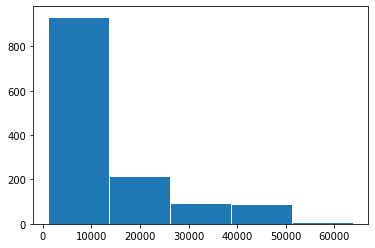

In [10]:
plt.hist(x=df['charges'], bins=5, edgecolor='white', linewidth=1)
plt.show()

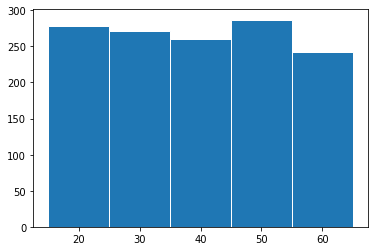

In [11]:
plt.hist(x=df['age'], bins=[15, 25, 35, 45, 55, 65], edgecolor='white', linewidth=1)
plt.show()

In [12]:
df['overweight'] = df.apply(lambda row: row['bmi'] > 25.0, axis=1)

df

,age,sex,bmi,children,smoker,region,charges,has_children,overweight
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,True
2,28,male,33.000,3,no,southeast,4449.46200,True,True
3,33,male,22.705,0,no,northwest,21984.47061,False,False
4,32,male,28.880,0,no,northwest,3866.85520,False,True
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,True
1334,18,female,31.920,0,no,northeast,2205.98080,False,True
1335,18,female,36.850,0,no,southeast,1629.83350,False,True
1336,21,female,25.800,0,no,southwest,2007.94500,False,True


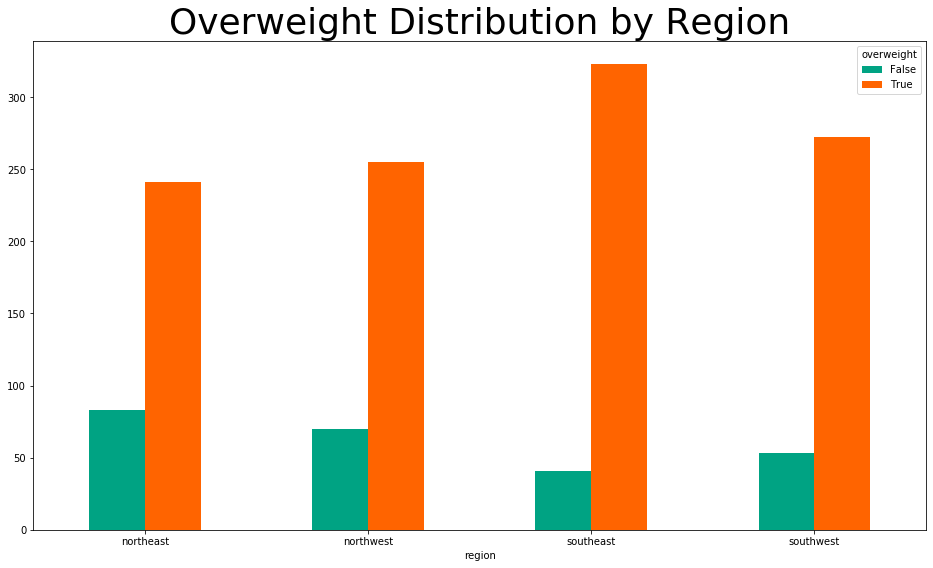

In [13]:
region_overweight_distribution = df.groupby(['region', 'overweight']).age.count().unstack()

fig = region_overweight_distribution.plot(kind='bar', figsize=(16, 9), color=['#00A383', '#FF6400'])
plt.title('Overweight Distribution by Region', size=36)
plt.xticks(rotation=0)
plt.show()

In [14]:
region_overweight_distribution.reset_index()

region_overweight_distribution.columns = ['False', 'True']
region_overweight_distribution

,False,True
region,,
northeast,83,241
northwest,70,255
southeast,41,323
southwest,53,272


In [15]:
region_overweight_distribution['Overweight'] = region_overweight_distribution['False'] / (region_overweight_distribution['True'] + region_overweight_distribution['False']) * 100

region_overweight_distribution['Not Overweight'] = region_overweight_distribution['True'] / (region_overweight_distribution['True'] + region_overweight_distribution['False']) * 100

region_overweight_distribution

,False,True,Overweight,Not Overweight
region,,,,
northeast,83,241,25.617284,74.382716
northwest,70,255,21.538462,78.461538
southeast,41,323,11.263736,88.736264
southwest,53,272,16.307692,83.692308


## Average Cost by Gender

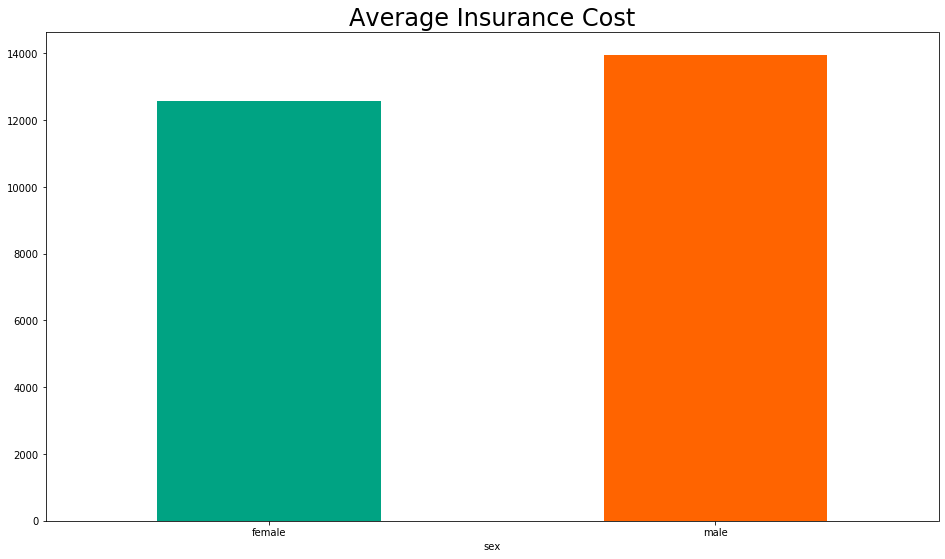

In [16]:
gender = df.groupby(['sex']).charges.mean()
fig = gender.plot(kind='bar', figsize=(16, 9), color=['#00A383', '#FF6400'])
plt.title('Average Insurance Cost', size=24)
plt.xticks(rotation=0)
plt.show()

## Average Cost by Children

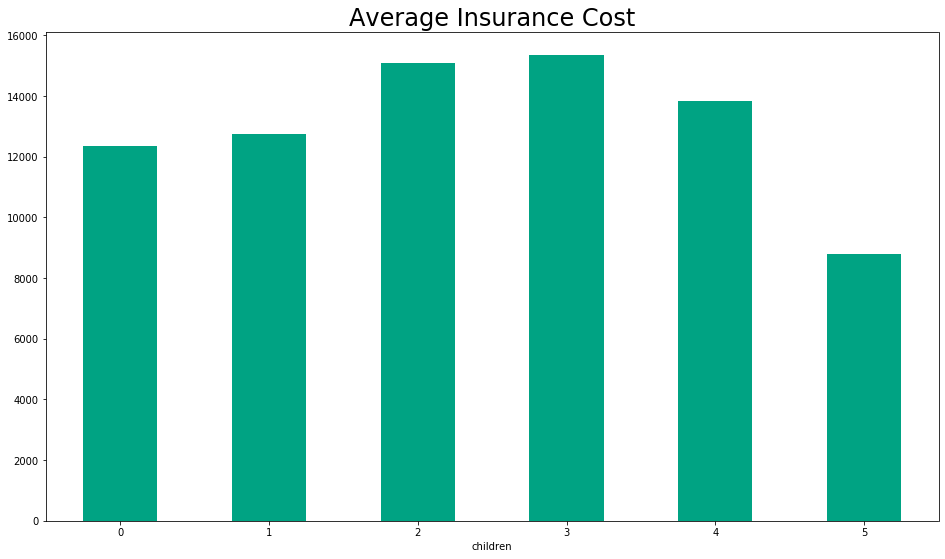

In [17]:
children = df.groupby(['children']).charges.mean()
fig = children.plot(kind='bar', figsize=(16, 9), color=['#00A383'])
plt.title('Average Insurance Cost', size=24)
plt.xticks(rotation=0)
plt.show()

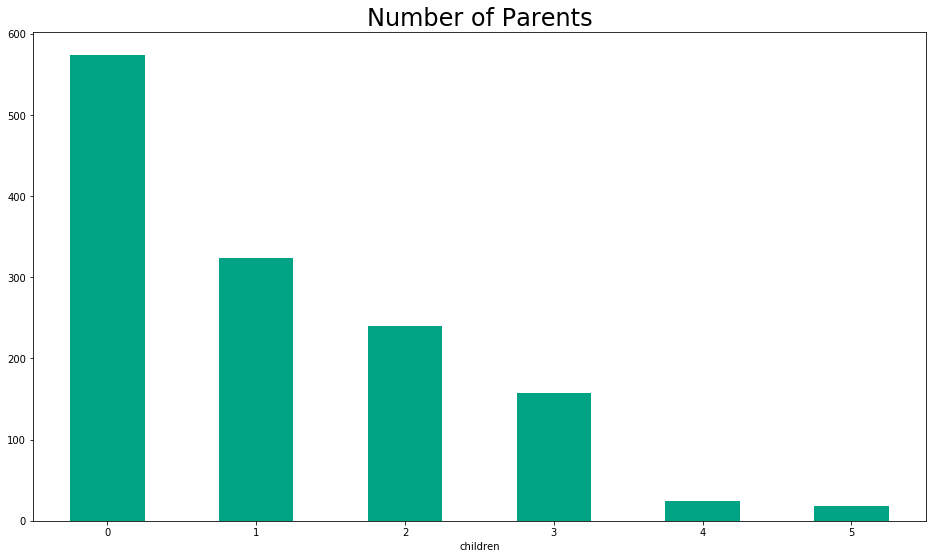

In [18]:
children = df.groupby(['children']).age.count()
fig = children.plot(kind='bar', figsize=(16, 9), color=['#00A383'])
plt.title('Number of Parents', size=24)
plt.xticks(rotation=0)
plt.show()

## Region and Gender

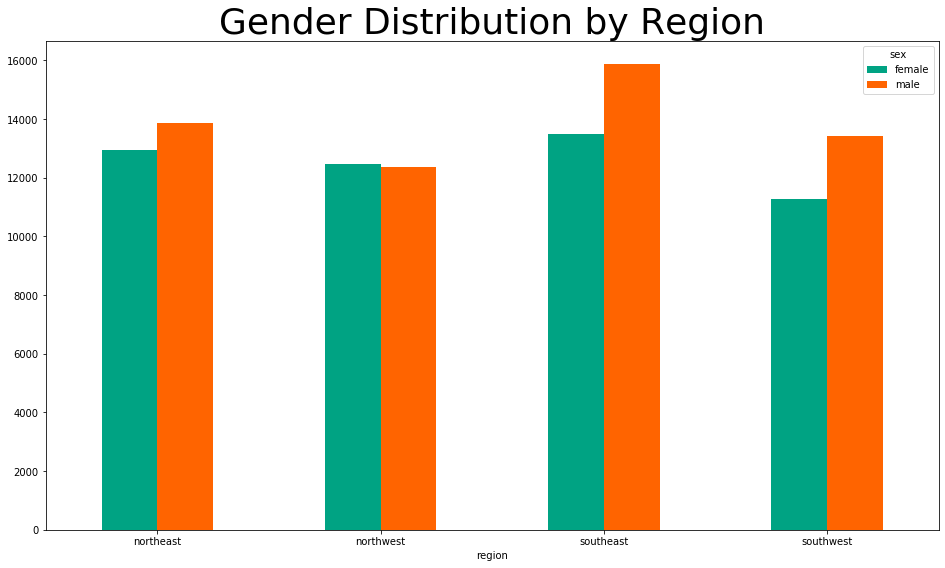

In [19]:
region_gender_distribution = df.groupby(['region', 'sex']).charges.mean().unstack()

fig = region_gender_distribution.plot(kind='bar', figsize=(16, 9), color=['#00A383', '#FF6400'])
plt.title('Gender Distribution by Region', size=36)
plt.xticks(rotation=0)
plt.show()

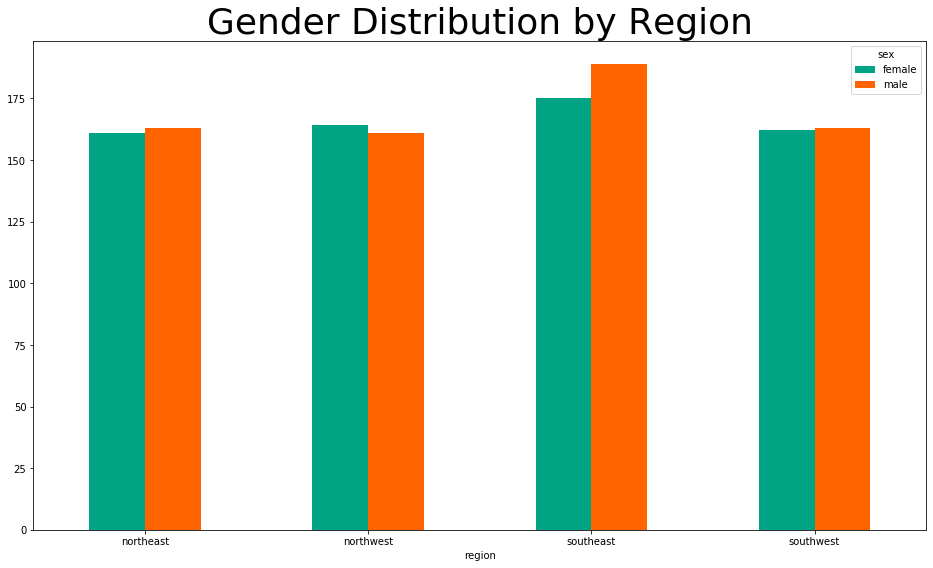

In [20]:
region_gender_distribution = df.groupby(['region', 'sex']).age.count().unstack()

fig = region_gender_distribution.plot(kind='bar', figsize=(16, 9), color=['#00A383', '#FF6400'])
plt.title('Gender Distribution by Region', size=36)
plt.xticks(rotation=0)
plt.show()

## Cost per Region

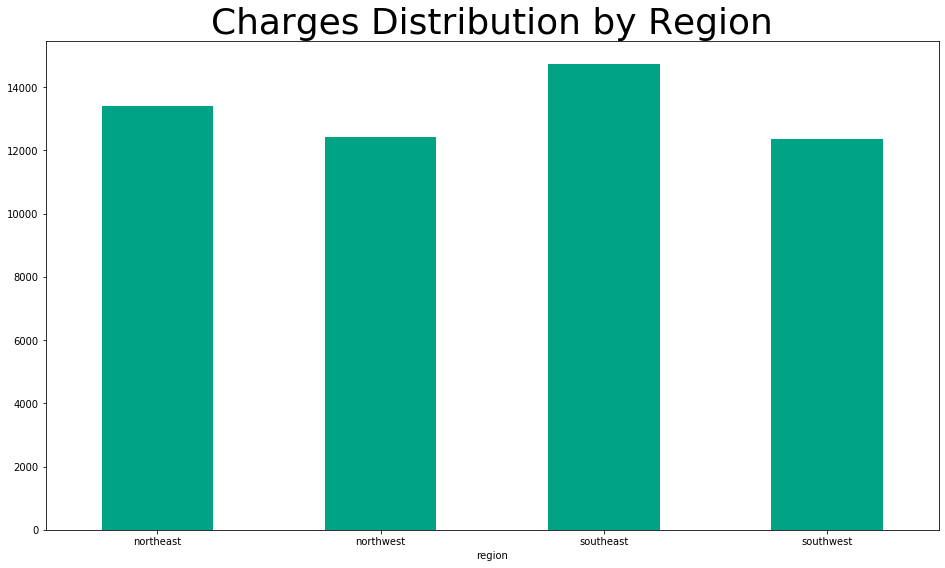

In [23]:
region_charges_distribution = df.groupby('region').charges.mean()

fig = region_charges_distribution.plot(kind='bar', figsize=(16, 9), color=['#00A383'])
plt.title('Charges Distribution by Region', size=36)
plt.xticks(rotation=0)
plt.show()

## Smoker by Region

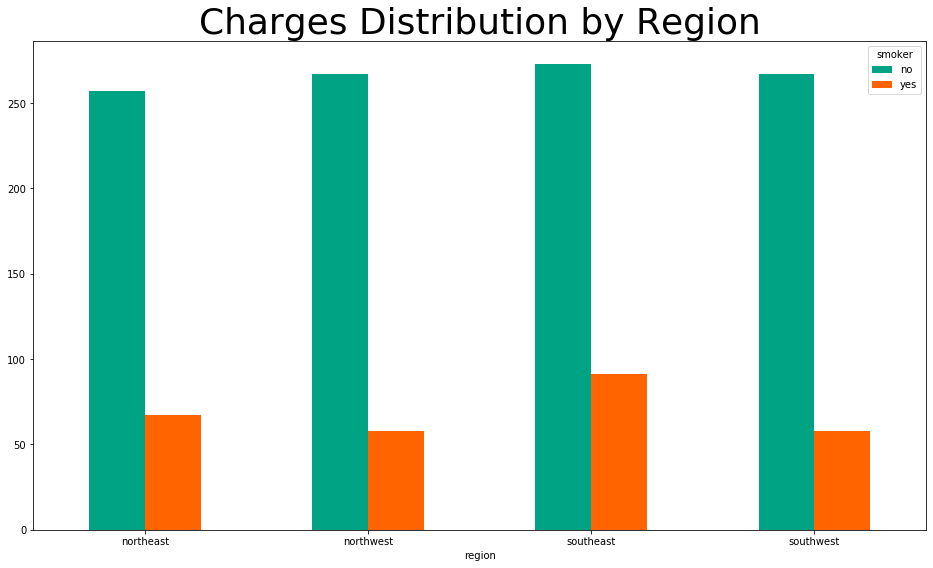

In [26]:
region_charges_distribution = df.groupby(['region', 'smoker']).age.count().unstack()

fig = region_charges_distribution.plot(kind='bar', figsize=(16, 9), color=['#00A383', '#FF6400'])
plt.title('Charges Distribution by Region', size=36)
plt.xticks(rotation=0)
plt.show()